In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [2]:
import yal

#modules = yal.read('./yal_files/ami33.yal')

modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

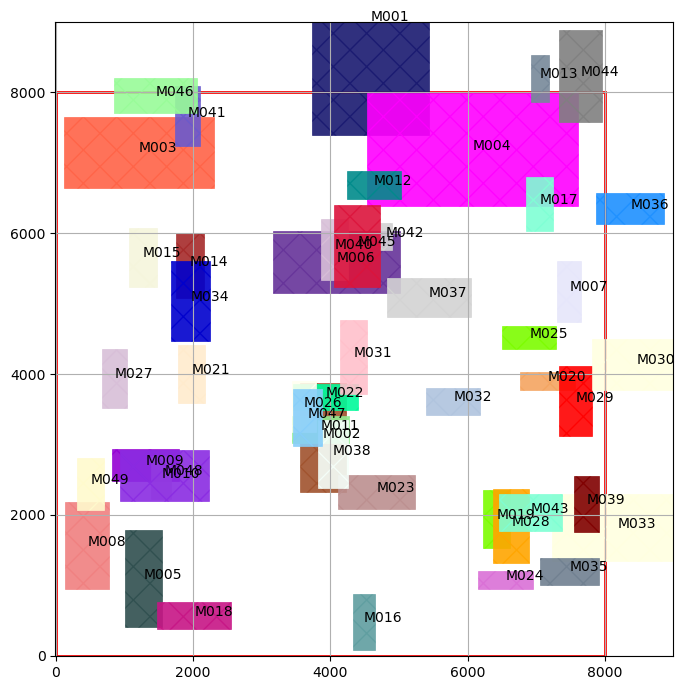

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 8000,
               "height" : 8000}

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 9000, 9000)

In [4]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


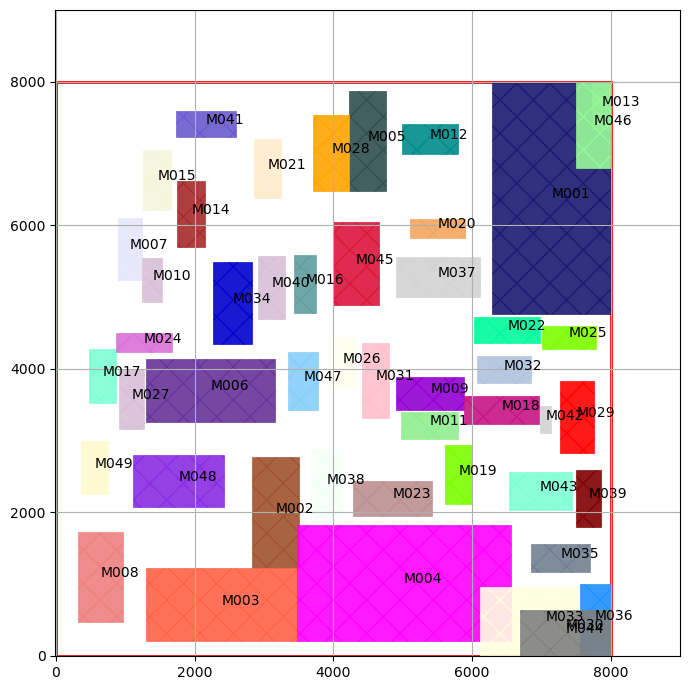

One Round of Interaction took: 65.48623991012573 seconds
Center Exploration took: 0.004029989242553711
Budge Exploration took: 0.01661539077758789
Hustle Exploration took: 0.004784584045410156
Swap Exploration took: 0.20896100997924805
Pair Exploration took: 0.8392481803894043
Center Exploration took: 0.00406956672668457
Center Exploration took: 0.004050493240356445
Budge Exploration took: 0.01196432113647461
Hustle Exploration took: 0.004376888275146484
Swap Exploration took: 0.20799756050109863
Pair Exploration took: 0.8330399990081787
Center Exploration took: 0.004029512405395508
Budge Exploration took: 0.011871099472045898
Hustle Exploration took: 0.004265785217285156
Swap Exploration took: 0.2025294303894043
Pair Exploration took: 0.8304040431976318
Center Exploration took: 0.004070281982421875
Budge Exploration took: 0.015829801559448242
Hustle Exploration took: 0.004053831100463867
Swap Exploration took: 0.20418310165405273
Pair Exploration took: 0.8339126110076904
Center Explor

KeyboardInterrupt: 

In [5]:
while True:

    participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 9000, 9000)

    print('One Round of Interaction took: ' + str(runtime) + ' seconds')


    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(last_moves)

    if moves.count('linger') == len(participants):

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 25:
            break

        else:
            layout_zone         = scale_layout_zone(layout_zone, 0.99) 

            participants        = reset_after_tightening(participants)



    # Minimum distance to large!